# Part II - (Presentation Title)
## by (Emmanuel Chukwuka Oraegbu)

## Investigation Overview

> The objective of this investigation primarily focuses on performance of loans in terms of completed repayments, profits and return on investments. we would be investigating various trends and factors which may be responsible for high performance or failure of loans.

> We aim to communicate the findings of our analysis in a brief, yet comprehensive and manner


## Dataset Overview

> This data set is a record of loans from Prosper Loan in the United States. It contains 113,937 loans with 81 variables on each loan. I would attempt to summarize, in this report, the actions taken to analyze the various relationships (univariate, bivariate, and multivariate) between variables in the dataset.
This research was undertaken to provide some insights into the performance of loans and the lending business as it relates to Prosper loans. A presentation of our findings would be made at the end of the analysis. Although the data frame has 81 features, this study is only interested in a few of the features. The data set consists of 113,937 rows and 81 columns, implying 113,937 recorded observations with 81 features. The main features of interest to this study include, but are not limited to the following; loan status, loan term, Employment Status, the borrower's home ownership status, state, verifiable income, and occupation. 
In total, about 11 features were pulled together over which the bulk of our exploration and analysis were done. 
Several steps were taken to clean the data further. making it suitable for analysis. these steps included; filling null values, dropping duplicate rows, renaming columns, changing data types, and transforming names. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# For better assessment set pandasDataFrame not to collapse rows and columns when displaying them
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
#store different color in variables for later use
dark_blue = sb.color_palette()[0]
orange = sb.color_palette()[1]
green =  sb.color_palette()[2]
red = sb.color_palette()[3]
purple = sb.color_palette()[4]
brown = sb.color_palette()[5]
grey = sb.color_palette()[7]

In [4]:
# a func to plot a univariate countplot
def plot_count(dataframe, x_axis= None, y_axis = None, plot_title = None, plot_order = None, plot_color = None, 
               tick_rotation = None, plot_fontsize = None, tick_fontsize = 12, x_label = None, y_label = None, 
               plot_hue = None, plot_title_fontsize = 18, plot_figsize = (15, 5), bartext_fontsize = 12):
    if plot_hue == None:
    #This is for plotting univariate count plots  
    
        plt.rcParams["figure.figsize"] = list(plot_figsize)
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams['font.size'] = bartext_fontsize
        plot = sb.countplot(data = dataframe, x = x_axis, y = y_axis, order = plot_order, color = plot_color)
        for p in plot.patches:
            #plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))
            plot.text(p.get_x(), p.get_height(), '{:.0f}'.format(p.get_height(), va = 'center', ha = 'center',  fontdict = None,))
        plt.title(plot_title) if plot_title == None else plt.title(plot_title.upper(), fontsize = plot_title_fontsize)
        plt.xticks(fontsize = tick_fontsize, rotation = tick_rotation)
        plt.yticks(fontsize = tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize);
        plt.plot()
    else:
        #This would plot bivariate count plots or bar charts
        plt.rcParams["figure.figsize"] = list(plot_figsize)
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams['font.size'] = bartext_fontsize
        plot = sb.countplot(data = dataframe, hue = plot_hue, x = x_axis, y = y_axis, order = plot_order, color = plot_color)
        for p in plot.patches:
            plot.text(p.get_x(), p.get_height(), '{:.0f}'.format(p.get_height(), va = 'center', ha = 'center',  fontdict = None,))
            #plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        plt.title(plot_title) if plot_title == None else plt.title(plot_title.upper(), fontsize = plot_title_fontsize)
        plt.xticks(rotation = tick_rotation)
        plt.xticks(fontsize = 12 if tick_fontsize == None else tick_fontsize, rotation = tick_rotation)
        plt.yticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize);
        plt.tight_layout()
        plt.plot()
plt.show();

In [5]:
# A function to plot a pie chart
def plot_pie(counts, plot_startangle = 0, plot_counterclock = False, plot_title = None, plot_fontsize = 12, 
             plot_title_fontsize = 18, plot_figsize = (8,8)):
    label = counts.index
    plt.figure(figsize = plot_figsize);
    plt.pie(counts, startangle = plot_startangle, counterclock = plot_counterclock, autopct='%.3f%%' )
    plt.legend(labels = label, fontsize = plot_fontsize, loc= 'center right', bbox_to_anchor =(1.2, 0.5))
    plt.title(plot_title.upper(), fontsize = plot_title_fontsize)
    plt.axis('square');

In [6]:
# define a func to plot hist
def sb_plot_hist(dataframe, x_axis = None, y_axis = None, plot_title = None, plot_title_font_size = 18,
              x_label = None, y_label = None, plot_fontsize = 12, plot_bin_number = 500, plot_color = None, 
              tick_fontsize = 12, plot_figsize = (15,10)):
    plt.figure(figsize=plot_figsize)
    plot = sb.histplot(data = dataframe, x = x_axis, bins = plot_bin_number, 
                       color = plot_color)
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
    plt.xticks(fontsize = tick_fontsize)
    plt.yticks(fontsize =  tick_fontsize)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize);


In [7]:
def plt_plot_hist(dataframe, x_axis = None, y_axis = None, bin_num = 1000, plot_title = None, plot_title_font_size = 18,
                 x_label = None, y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, 
                  plot_figsize = (15,10), bin_edge = 0):
    bin = np.arange(bin_edge, dataframe[y_axis if x_axis == None else x_axis].max()+bin_num, bin_num)
    plt.figure(figsize = plot_figsize)
    plt.hist(data = prosper, x = x_axis, bins = bin);
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
    plt.xticks(fontsize = tick_fontsize)
    plt.yticks(fontsize =  tick_fontsize)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize);

In [8]:
# define a func to plot kernel density estimate
def plot_kde(dataframe, x_axis = None, y_axis = None, plot_title = None, x_label = None, y_label = None, 
             should_fill = False, plot_fontsize = None, tick_fontsize = None ):
    #dataset = sb.load_dataset('dataframe')
    plt.figure(figsize=(20,5))
    sb.kdeplot(data = dataframe, x = x_axis, y = y_axis, fill = should_fill)
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
    plt.xticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
    plt.yticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize);

In [9]:
def plot_word_count( text, plot_title = None, plot_fontsize = 12, plot_width = None, plot_height= None, plot_margin=None, 
                    prefer_horizontal=0.9,  background_color=None, mode='RGBA', relative_scaling='auto', collocations=True, 
                    colormap=None, normalize_plurals=True,  plot_contour_color='black', x_label = None, y_label = None,
                    max_plot_fontsize = 12):
    # Generate a word cloud image
    wordcloud = WordCloud(background_color, max_font_size = max_plot_fontsize).generate(text)
    plt.figure(figsize=(20,10))
    plt.suptitle('' if plot_title == None else plot_title.upper(), fontsize= plot_fontsize)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
    plt.axis('off')
    plt.show();

In [10]:
def sb_scatter_plot(dataframe, x_axis = None, y_axis = None, plot_title = None, plot_title_font_size = 18, x_label = None, 
             y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, plot_figsize = (15,10),
#if you want to plot a regplot, you supply the regplot title and regplot = True
                    reg_plot = False, reg_plot_title = None, plot_hue = None):
    #print(dataframe, x_axis, y_axis)
    #make arrangements to accomodate jitter and transparency
    if plot_hue == None:
        plt.figure(figsize=plot_figsize)
        plot = sb.scatterplot(data = dataframe, x = x_axis, y = y_axis)
        plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
        plt.xticks(fontsize = tick_fontsize)
        plt.yticks(fontsize =  tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
        plt.show();
        if reg_plot == True:
            plot = sb.regplot(data = dataframe, x = x_axis, y = y_axis)
            plt.title('' if reg_plot_title == None else reg_plot_title.upper(), fontsize = plot_title_font_size)
            plt.xticks(fontsize = tick_fontsize)
            plt.yticks(fontsize =  tick_fontsize)
            plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
            plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
            plt.show();
    else:
        plt.figure(figsize=plot_figsize)
        plot = sb.scatterplot(data = dataframe, x = x_axis, y = y_axis, hue = plot_hue)
        plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
        plt.xticks(fontsize = tick_fontsize)
        plt.yticks(fontsize =  tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
        plt.show();

In [11]:
def plot_heat_map(dataframe, columns = (), plot_title = None, plot_title_font_size = 18,x_label = None, 
                  y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, plot_figsize = (15,10)):
    plt.figure(figsize=plot_figsize)
    sb.set()
    dataset = sb.load_dataset(dataframe)
    dataset = dataset.map(pivot, columns)
    sb.heatmap(dataset)
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
    plt.xticks(fontsize = tick_fontsize)
    plt.yticks(fontsize =  tick_fontsize)
    plt.show();

In [12]:
#Violin plots are used to show the relationships between a quantitative and a qualitative variable
# x_axis must be the categorical variable

# sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# Change the qualitative variable type using this example
# vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
# fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
'''
Make sure to fill out null values before proceeding to plot your visualizations with this function
Plot the categorical variable on the x_axis
'''
def plot_violin(dataframe, x_axis = None, y_axis = None, plot_title = None, plot_title_font_size = 18,
              x_label = None, y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, 
                     plot_figsize = (15,10), tick_rotation = None, univariate = False, bivariate = False):
#the categorical/qualitative variable must be the x_axis
# we are going to use occupation and estimatedreturn to test this function
#types of occupation 
#Prepare the categorical data for analysis by changing the datatype
    if univariate == True:
        plt.figure(figsize=plot_figsize)
        sb.violinplot(data= dataframe, x= x_axis,)
        plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
        plt.xticks(fontsize = tick_fontsize, rotation = tick_rotation)
        plt.yticks(fontsize =  tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
        plt.show();
    elif bivariate == True:
        variable_classes = dataframe[x_axis].unique()
        _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
        dataframe[x_axis] = dataframe[x_axis].astype(_classes)
        plt.figure(figsize=plot_figsize)
        sb.violinplot(data= dataframe, x= x_axis, y= y_axis)
        plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
        plt.xticks(fontsize = tick_fontsize, rotation = tick_rotation)
        plt.yticks(fontsize =  tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
        plt.show();
    else:
        return('please set univariate = True if you are plotting a single variable or bivariate = True for two variables')

In [13]:
# box plots are used to show the relationship between a qualitative and a numerical variable
# x_axis must be the categorical variable 
'''
Make sure to fill out null values before proceeding to plot your visualizations with this function
The categorical variable must be assigned to the x_axis
horizontal is used to change the axis of the plot
we can plot univariate box plots by setting the univariate argument to True
'''
def plot_boxplot(dataframe, x_axis= None, y_axis = None, plot_title = None, plot_color = None, tick_rotation = None, 
                 plot_fontsize = None, tick_fontsize =12 , x_label = None, y_label = None, plot_figsize =(15,10), 
                 horizontal = False, univariate = False, bivariate = False):
    if univariate == True:
        plt.figure(figsize = plot_figsize)
        sb.boxplot(data = dataframe, x = x_axis, color = plot_color)
        plt.title(plot_title) if plot_title == None else plt.title(plot_title.upper(), fontsize = 18 if plot_fontsize == None else plot_fontsize)
        plt.xticks(rotation = tick_rotation)
        plt.xticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
        plt.yticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize);
        plt.tight_layout()
        plt.show();
    elif bivariate == True:
        #Prepare the categorical data for analysis by changing the datatype
        variable_classes = dataframe[x_axis].unique()
        _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
        dataframe[x_axis] = dataframe[x_axis].astype(_classes)    
        if horizontal == True:
                plt.figure(figsize = plot_figsize)
                sb.boxplot(data = dataframe, y = x_axis, x = y_axis, color = plot_color)
                plt.title(plot_title) if plot_title == None else plt.title(plot_title.upper(), fontsize = 18 if plot_fontsize == None else plot_fontsize)
                plt.xticks(rotation = tick_rotation)
                plt.xticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
                plt.yticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
                plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
                plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize);
                plt.tight_layout()
                plt.show();
        else:
                plt.figure(figsize = plot_figsize)
                sb.boxplot(data = dataframe, x = x_axis, y = y_axis)
                plt.title(plot_title) if plot_title == None else plt.title(plot_title.upper(), fontsize = 18 if plot_fontsize == None else plot_fontsize)
                plt.xticks(rotation = tick_rotation)
                plt.xticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
                plt.yticks(fontsize = 12 if tick_fontsize == None else tick_fontsize)
                plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize)
                plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if plot_fontsize == None else plot_fontsize);
                plt.tight_layout()
                plt.show();
    else:
        return('Warning! please set univariate = True if you are plotting a single variable or bivariate = True for two variables')

In [14]:
def plot_faceting(dataframe, x_axis = None, y_axis = None, plot_title = None, plot_title_font_size = 18,
              x_label = None, y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, 
                     plot_figsize = (15,10), ordered = False):
    '''
    Always assign the categorical variable to the x_axis
    facets can be plotted in order of increasing means by using the argument ordered = True
    '''
    #Prepare the categorical data for analysis by changing the datatype
    variable_classes = dataframe[x_axis].unique()
    _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
    dataframe[x_axis] = dataframe[x_axis].astype(_classes)
    
    group_means = dataframe[[x_axis, y_axis]].groupby([x_axis]).mean()
    group_order = group_means.sort_values([y_axis], ascending = False).index

    
    plt.figure(figsize=plot_figsize)
    g = sb.FacetGrid(data = dataframe, col = x_axis, col_wrap = 4, col_order = group_order if ordered == True else None)
    g.map(plt.hist, y_axis);
    
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
    plt.xticks(fontsize = tick_fontsize)
    plt.yticks(fontsize =  tick_fontsize)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
    plt.show();

In [15]:
def plot_lineplot(dataframe, x_axis = None, y_axis = None, plot_title = None, plot_title_font_size = 18,
              x_label = None, y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, 
                     plot_figsize = (15,10)):
    plt.figure(figsize=plot_figsize)
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
    plt.xticks(fontsize = tick_fontsize)
    plt.yticks(fontsize =  tick_fontsize)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
    plt.show();

In [16]:
def template(dataframe, x_axis = None, y_axis = None, plot_title = None, plot_title_font_size = 18,
              x_label = None, y_label = None, plot_fontsize = 12, plot_color = None, tick_fontsize = 12, 
                     plot_figsize = (15,10)):
    plt.figure(figsize=plot_figsize)
    plt.title('' if plot_title == None else plot_title.upper(), fontsize = plot_title_font_size)
    plt.xticks(fontsize = tick_fontsize)
    plt.yticks(fontsize =  tick_fontsize)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = plot_fontsize)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = plot_fontsize)
    plt.show();

In [17]:
# load in the dataset into a pandas dataframe and make a copy of the dataFrame
loan_df = pd.read_csv('prosper_cleaned.csv')
prosper = loan_df.copy()

In [18]:
prosper['borrowerstate'].value_counts()

CALIFORNIA              14594
TEXAS                    6786
FLORIDA                  6667
NEW YORK                 6660
ILLINOIS                 5872
unlisted                 5515
GEORGIA                  4976
OHIO                     4164
MICHIGAN                 3568
VIRGINIA                 3251
NORTH CAROLINA           3067
NEW JERSEY               3062
WASHINGTON               3026
PENNSYLVANIA             2950
MARYLAND                 2794
MISSOURI                 2598
MINNESOTA                2308
MASSACHUSETTS            2222
COLORADO                 2189
INDIANA                  2069
ARIZONA                  1882
WISCONSIN                1827
OREGON                   1806
TENNESSEE                1727
ALABAMA                  1668
CONNECTICUT              1613
SOUTH CAROLINA           1109
NEVADA                   1078
KANSAS                   1052
KENTUCKY                  974
OKLAHOMA                  966
LOUISIANA                 942
UTAH                      873
ARKANSAS  

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

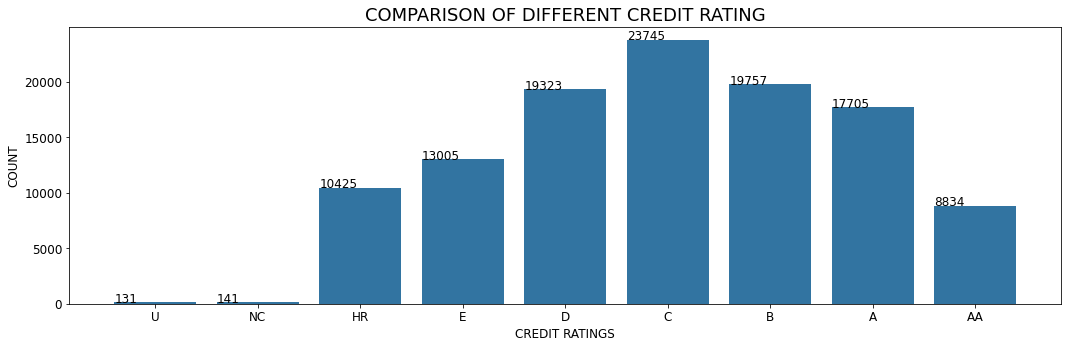

In [19]:
#count plot showing the distribution of credit ratings
plot_count(prosper, x_axis = 'credit_rating', plot_color = dark_blue, x_label = 'credit ratings', y_label = 'count',
             plot_order = ['U', 'NC', 'HR', 'E', 'D', 'C', 'B',  'A', 'AA', ] , 
             plot_title = 'Comparison of different Credit rating');

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

In [21]:
prosper['borrowerstate']

0                     COLORADO
1                     COLORADO
2                      GEORGIA
3                      GEORGIA
4                    MINNESOTA
5                   NEW MEXICO
6                       KANSAS
7                   CALIFORNIA
8                     ILLINOIS
9                     MARYLAND
10                    unlisted
11                     ALABAMA
12                     ARIZONA
13                    VIRGINIA
14                     FLORIDA
15                  CALIFORNIA
16                    unlisted
17                PENNSYLVANIA
18                      OREGON
19                   MINNESOTA
20                    MICHIGAN
21                    NEW YORK
22                    ILLINOIS
23                   LOUISIANA
24                  CALIFORNIA
25                    NEW YORK
26                    COLORADO
27                PENNSYLVANIA
28                  CALIFORNIA
29                   WISCONSIN
30                    NEW YORK
31                    ILLINOIS
32      

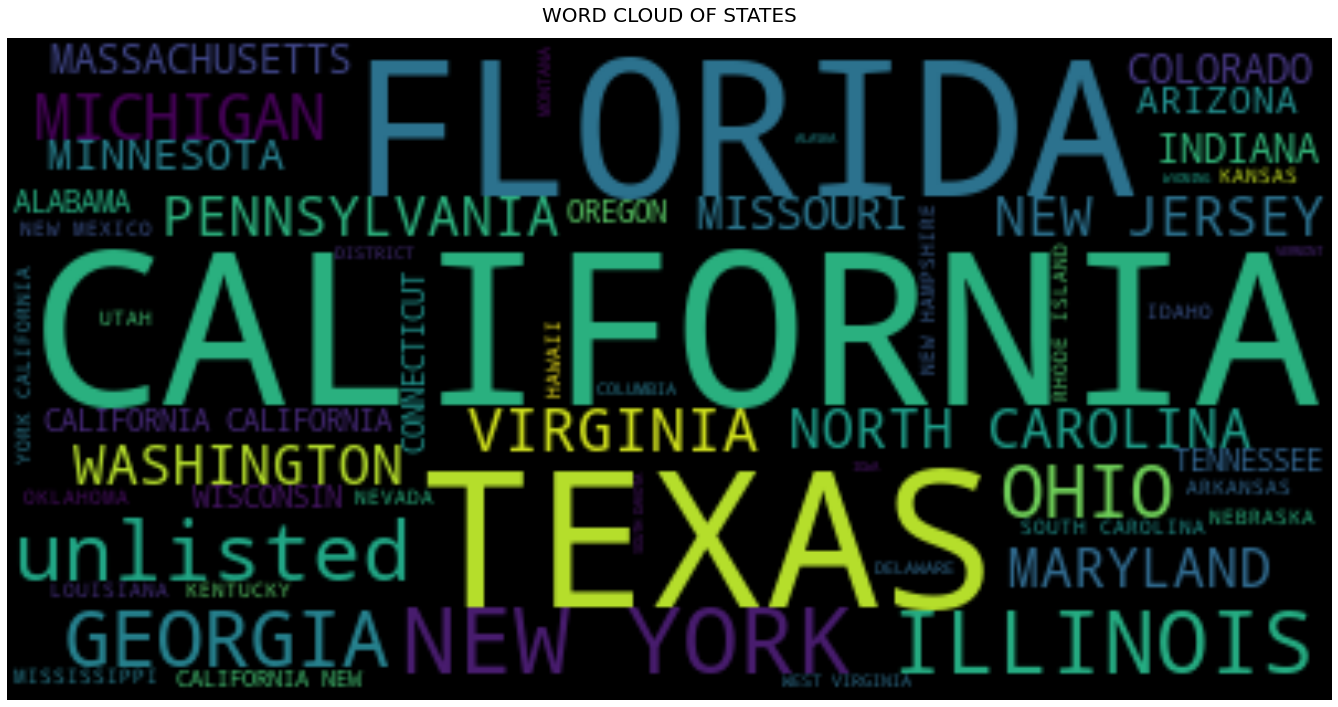

In [22]:
#word cloud comparing the proportion of loans by states in the datasets
text = "".join(i for i in str(prosper['borrowerstate']))
plot_word_count(text, max_plot_fontsize = 100, plot_title = 'word cloud of states', plot_fontsize = 20)

## (Visualization 3)



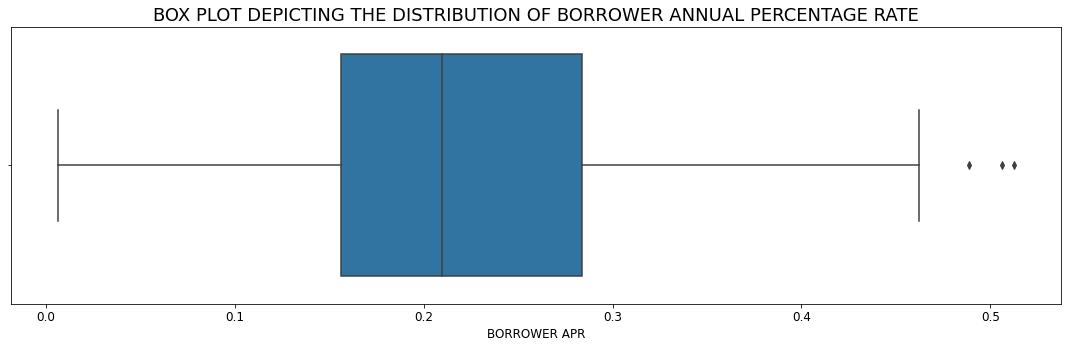

In [23]:
# box plot showing the distribution of borrower apr
plot_boxplot(prosper, x_axis = 'borrowerapr', univariate = True, plot_figsize = (15,5), x_label = 'borrower apr'
             ,plot_title = 'box plot depicting the distribution of borrower annual percentage rate')

## (Visualization 4)



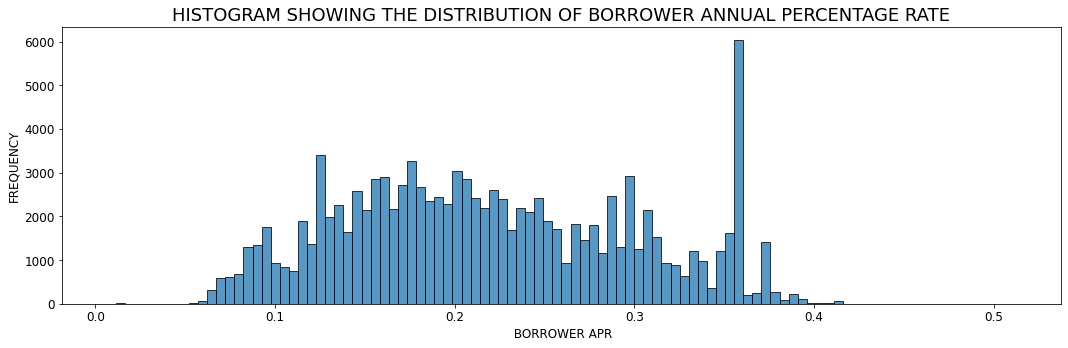

In [24]:
#histogram depicting the distribution of borrower apr
sb_plot_hist(prosper, x_axis = 'borrowerapr', plot_figsize =(15,5), plot_bin_number = 100, x_label =" borrower apr",
             plot_title = 'Histogram showing the distribution of borrower annual percentage rate', y_label = 'frequency')

## (Visualization 5)



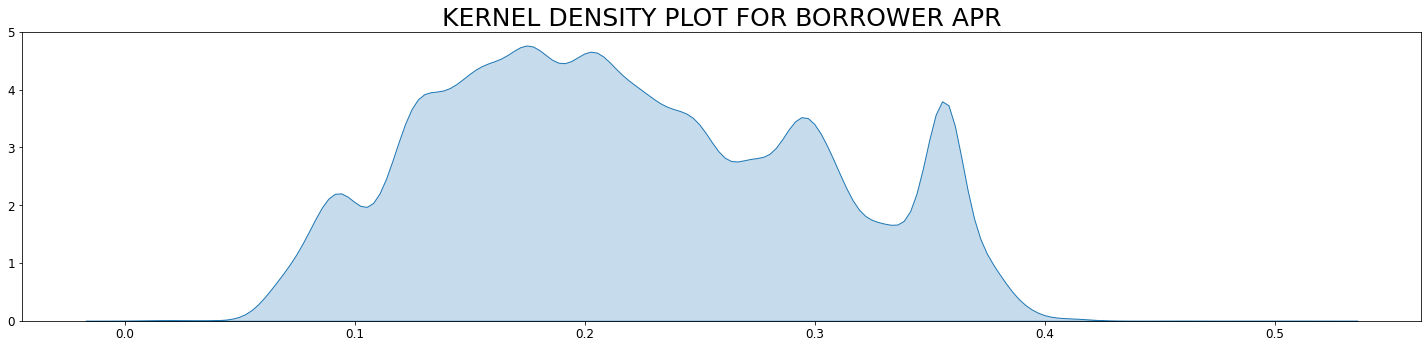

In [25]:
#kernel density estimate showing the distribution of borrower apr
plot_kde(prosper, x_axis = 'borrowerapr', should_fill = True, plot_fontsize = 25, plot_title ='kernel density plot for borrower apr')

## (Visualization 6)



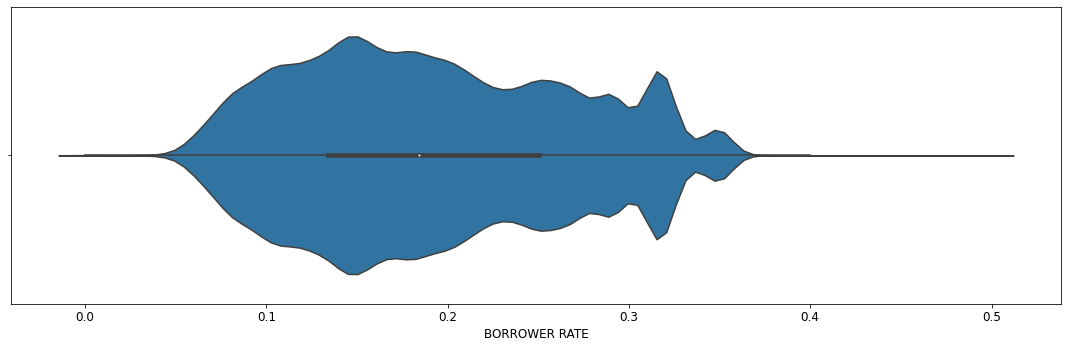

In [26]:
# violin plot analyzing the borrower rate
plot_violin(prosper, x_axis = 'borrowerrate', univariate = True, plot_figsize = (15,5), x_label = 'borrower rate')

## (Visualization 7)



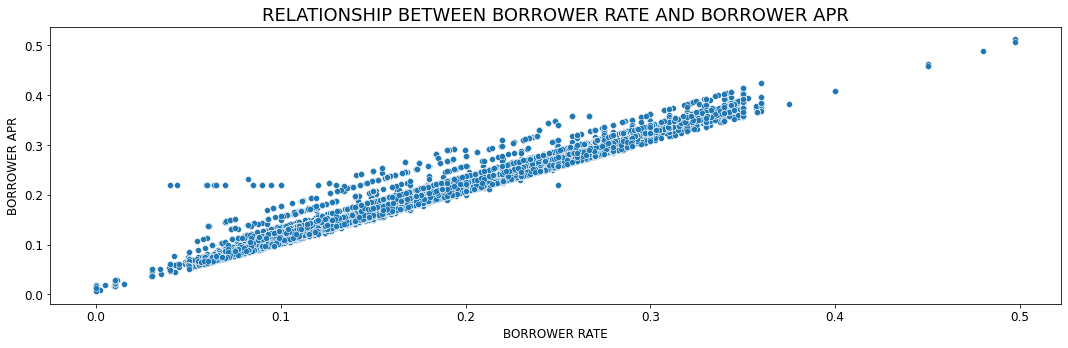

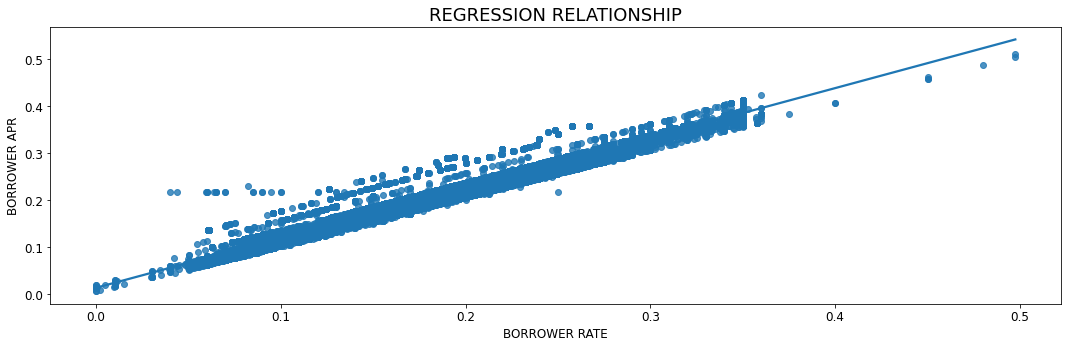

In [27]:
#scatter plot showing the correlation between borrowerrate and borrowerapr
sb_scatter_plot(prosper, x_axis = "borrowerrate", x_label ='Borrower rate', y_axis = 'borrowerapr', y_label ='borrower apr',
                plot_title='relationship between borrower rate and borrower apr', reg_plot_title = 'regression relationship',
                plot_figsize= (15,5), reg_plot = True )

## (Visualization 8)



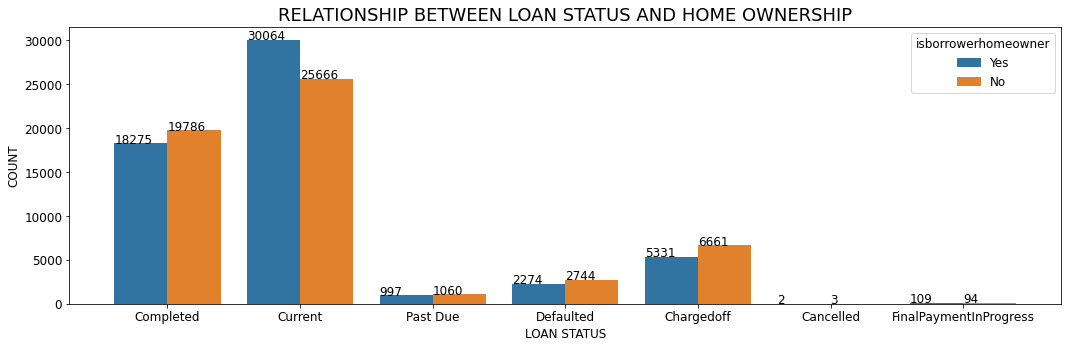

In [28]:
#clustered bar chart showing the relationship between loanstatus, borrower homeownership
plot_count(prosper, x_axis = 'loanstatus', plot_hue ='isborrowerhomeowner', x_label = 'Loan status', y_label = 'count',
           plot_title ='Relationship between loan status and home ownership')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [29]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 5000054 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\PC\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\PC\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\PC\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\PC\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 